Running runtime analysis for 10 values of n...


100%|██████████| 10/10 [25:35:40<00:00, 9214.03s/it]  


[(10000, 100000000, 20657.456159591675, 0.00020657456159591675), (20000, 400000000, 80894.7917090522, 0.0002022369792726305), (30000, 900000000, 200998.06422657438, 0.00022333118247397154), (40000, 1600000000, 368784.545024236, 0.00023049034064014752), (50000, 2500000000, 549529.0342569351, 0.00021981161370277405), (60000, 3600000000, 831535.3336599139, 0.00023098203712775385), (70000, 4900000000, 1179578.8251823848, 0.000240730372486201), (80000, 6400000000, 1554221.6173887253, 0.00024284712771698833), (90000, 8100000000, 2017392.3583745956, 0.000249060784984518), (100000, 10000000000, 2384347.927379608, 0.00023843479273796082)]
Table ALG1 (Brute Force) saved to table_alg1_brute_force.csv
Table ALG2 (Divide and Conquer) saved to table_alg2_divide_conquer.csv

Estimated c1 (Brute Force): 2.490608e-04
Estimated c2 (Divide and Conquer): 2.966657e-03


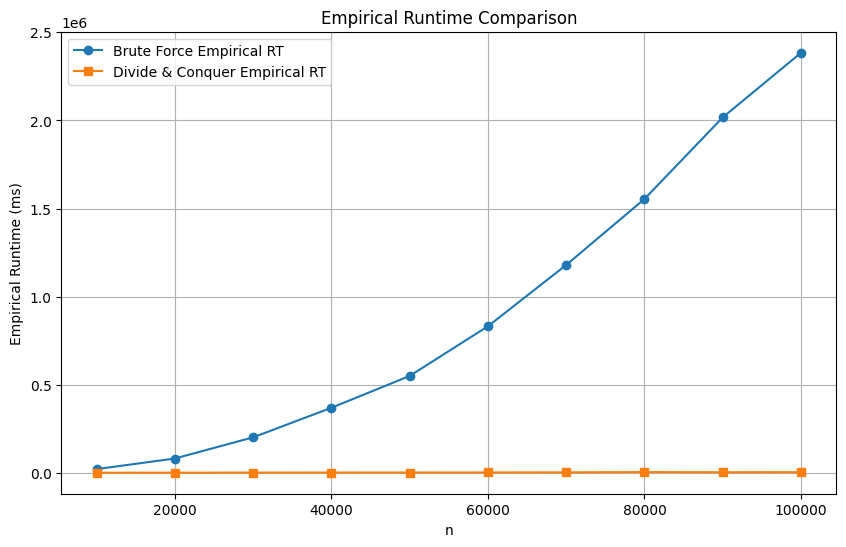

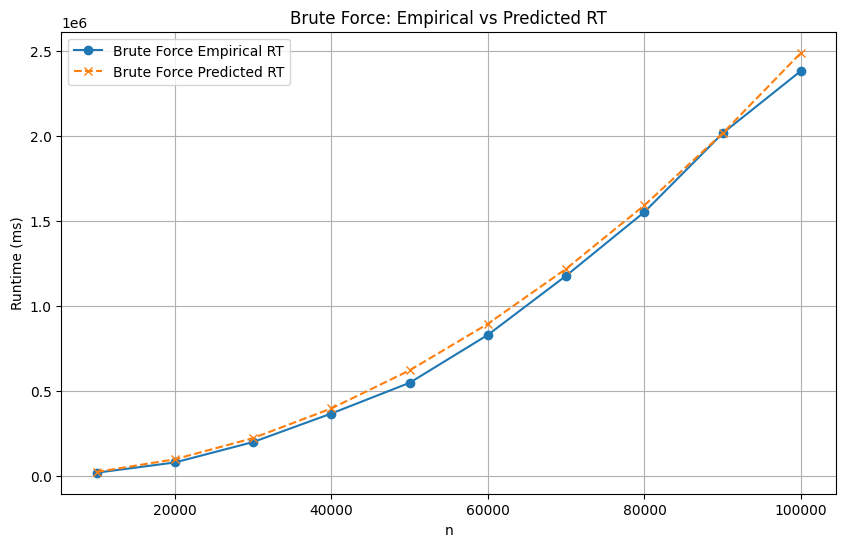

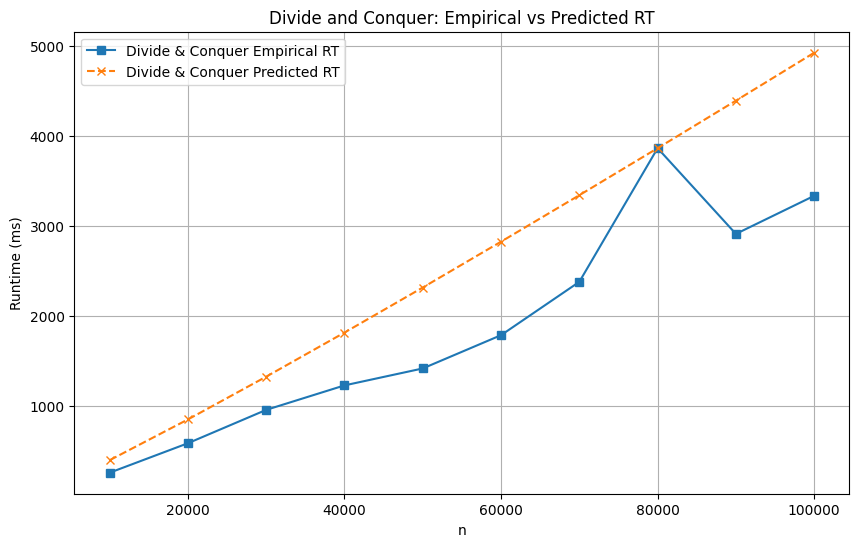

In [ ]:
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm


def merge_sort(points, key=lambda p: p):
    if len(points) <= 1:
        return points
    mid = len(points) // 2
    left = merge_sort(points[:mid], key)
    right = merge_sort(points[mid:], key)
    return merge(left, right, key)


def merge(left, right, key):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if key(left[i]) <= key(right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return [x for x in data if lower <= x <= upper]


def average_runtime(func, points, runs=10):
    runtimes = []
    for _ in range(runs):
        start = time.time()
        func(points)
        elapsed = (time.time() - start) * 1000
        runtimes.append(elapsed)
    filtered = remove_outliers(runtimes)
    return sum(filtered) / len(filtered) if filtered else sum(runtimes) / len(runtimes)


def analyze_algorithms():
    n_values = [i * 10000 for i in range(1, 11)]
    bf_results = []
    dc_results = []

    for n in tqdm(n_values):
        points = GenerateRandomPoints(n)

        bf_time = average_runtime(brute_force_closest_points, points)
        theoretical_bf = n ** 2
        ratio_bf = bf_time / theoretical_bf
        bf_results.append((n, theoretical_bf, bf_time, ratio_bf))

        dc_time = average_runtime(divide_and_conquer_closest_pair, points)
        theoretical_dc = n * math.log2(n)
        ratio_dc = dc_time / theoretical_dc
        dc_results.append((n, theoretical_dc, dc_time, ratio_dc))

    return bf_results, dc_results


def generate_tables(results, label, filename):
    df = pd.DataFrame(results, columns=["n", "TheoreticalRT", "EmpiricalRT (ms)", "Ratio"])
    c = df["Ratio"].max()
    df["PredictedRT"] = df["TheoreticalRT"] * c
    df.to_csv(filename, index=False)
    print(f"Table {label} saved to {filename}")
    return df, c


def plot_graphs(df_bf, df_dc):
    plt.figure(figsize=(10, 6))
    plt.plot(df_bf["n"], df_bf["EmpiricalRT (ms)"], 'o-', label="Brute Force Empirical RT")
    plt.plot(df_dc["n"], df_dc["EmpiricalRT (ms)"], 's-', label="Divide & Conquer Empirical RT")
    plt.xlabel("n")
    plt.ylabel("Empirical Runtime (ms)")
    plt.title("Empirical Runtime Comparison")
    plt.legend()
    plt.grid(True)
    plt.savefig("Empirical_Comparison.png")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df_bf["n"], df_bf["EmpiricalRT (ms)"], 'o-', label="Brute Force Empirical RT")
    plt.plot(df_bf["n"], df_bf["PredictedRT"], 'x--', label="Brute Force Predicted RT")
    plt.xlabel("n")
    plt.ylabel("Runtime (ms)")
    plt.title("Brute Force: Empirical vs Predicted RT")
    plt.legend()
    plt.grid(True)
    plt.savefig("Brute_Force_Predicted.png")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df_dc["n"], df_dc["EmpiricalRT (ms)"], 's-', label="Divide & Conquer Empirical RT")
    plt.plot(df_dc["n"], df_dc["PredictedRT"], 'x--', label="Divide & Conquer Predicted RT")
    plt.xlabel("n")
    plt.ylabel("Runtime (ms)")
    plt.title("Divide and Conquer: Empirical vs Predicted RT")
    plt.legend()
    plt.grid(True)
    plt.savefig("Divide_Conquer_Predicted.png")
    plt.show()


def GenerateRandomPoints(n):
    points = set()
    while len(points) < n:
        point = (random.randint(0, 100000000), random.randint(0, 100000000))
        points.add(point)
    return list(points)


def euclidean_distance(p1, p2):
    return math.hypot(p1[0] - p2[0], p1[1] - p2[1])


def brute_force_closest_points(P):
    n = len(P)
    d_min = float('inf')
    index_1, index_2 = 0, 1
    for i in range(n - 1):
        for j in range(i + 1, n):
            d = euclidean_distance(P[i], P[j])
            if d < d_min:
                d_min = d
                index_1, index_2 = i, j
    return P[index_1], P[index_2], d_min


def closest_pair_recursive(Px, Py):
    n = len(Px)
    if n <= 3:
        return brute_force_closest_points(Px)

    mid = n // 2
    Qx = Px[:mid]
    Rx = Px[mid:]
    midpoint_x = Px[mid][0]

    Qy = [p for p in Py if p[0] <= midpoint_x]
    Ry = [p for p in Py if p[0] > midpoint_x]

    q1, q2, d_q = closest_pair_recursive(Qx, Qy)
    r1, r2, d_r = closest_pair_recursive(Rx, Ry)

    delta = min(d_q, d_r)
    best_pair = (q1, q2) if d_q < d_r else (r1, r2)

    strip = [p for p in Py if abs(p[0] - midpoint_x) < delta]

    for i in range(len(strip)):
        for j in range(i + 1, min(i + 16, len(strip))):
            p, q = strip[i], strip[j]
            dist = euclidean_distance(p, q)
            if dist < delta:
                delta = dist
                best_pair = (p, q)

    return best_pair[0], best_pair[1], delta


def divide_and_conquer_closest_pair(P):
    Px = merge_sort(P, key=lambda p: p[0])
    Py = merge_sort(P, key=lambda p: p[1])
    return closest_pair_recursive(Px, Py)


if __name__ == "__main__":
    print("Running runtime analysis for 10 values of n...")
    bf_results, dc_results = analyze_algorithms()

    print(bf_results)
    df_bf, c1 = generate_tables(bf_results, "ALG1 (Brute Force)", "table_alg1_brute_force.csv")
    df_dc, c2 = generate_tables(dc_results, "ALG2 (Divide and Conquer)", "table_alg2_divide_conquer.csv")

    print(f"\nEstimated c1 (Brute Force): {c1:e}")
    print(f"Estimated c2 (Divide and Conquer): {c2:e}")

    plot_graphs(df_bf, df_dc)

In [ ]:
print(df_dc)

        n  TheoreticalRT  EmpiricalRT (ms)     Ratio  PredictedRT
0   10000   1.328771e+05        254.942152  0.001919   394.200813
1   20000   2.857542e+05        583.010459  0.002040   847.734760
2   30000   4.461802e+05        954.138623  0.002138  1323.663628
3   40000   6.115085e+05       1226.516604  0.002006  1814.135788
4   50000   7.804820e+05       1414.970689  0.001813  2315.422243
5   60000   9.523605e+05       1785.168362  0.001874  2825.326659
6   70000   1.126655e+06       2378.679037  0.002111  3342.397773
7   80000   1.303017e+06       3865.604115  0.002967  3865.604115
8   90000   1.481187e+06       2911.805654  0.001966  4394.174452
9  100000   1.660964e+06       3335.478687  0.002008  4927.510158


In [ ]:
print(df_bf)

        n  TheoreticalRT  EmpiricalRT (ms)     Ratio   PredictedRT
0   10000      100000000      2.065746e+04  0.000207  2.490608e+04
1   20000      400000000      8.089479e+04  0.000202  9.962431e+04
2   30000      900000000      2.009981e+05  0.000223  2.241547e+05
3   40000     1600000000      3.687845e+05  0.000230  3.984973e+05
4   50000     2500000000      5.495290e+05  0.000220  6.226520e+05
5   60000     3600000000      8.315353e+05  0.000231  8.966188e+05
6   70000     4900000000      1.179579e+06  0.000241  1.220398e+06
7   80000     6400000000      1.554222e+06  0.000243  1.593989e+06
8   90000     8100000000      2.017392e+06  0.000249  2.017392e+06
9  100000    10000000000      2.384348e+06  0.000238  2.490608e+06


In [ ]:
print("Brute Force Algorithm\n")
print(df_bf)

Brute Force Algorithm

        n  TheoreticalRT  EmpiricalRT (ms)     Ratio   PredictedRT
0   10000      100000000      2.065746e+04  0.000207  2.490608e+04
1   20000      400000000      8.089479e+04  0.000202  9.962431e+04
2   30000      900000000      2.009981e+05  0.000223  2.241547e+05
3   40000     1600000000      3.687845e+05  0.000230  3.984973e+05
4   50000     2500000000      5.495290e+05  0.000220  6.226520e+05
5   60000     3600000000      8.315353e+05  0.000231  8.966188e+05
6   70000     4900000000      1.179579e+06  0.000241  1.220398e+06
7   80000     6400000000      1.554222e+06  0.000243  1.593989e+06
8   90000     8100000000      2.017392e+06  0.000249  2.017392e+06
9  100000    10000000000      2.384348e+06  0.000238  2.490608e+06
